In [1]:
import numpy as np
import pandas as pd
from fasttext import FastText

In [2]:
import seaborn as sns
from scipy.spatial import ConvexHull

In [3]:
ft_ru = FastText.load_model('cc.ru.300.bin')

In [4]:
import json
import io
import os

with io.open(os.path.join(os.getcwd(), 'data', 'habr-favorites.json'), encoding='utf-8') as fp:
    data_ru = json.load(fp)

In [5]:
len(data_ru)

4732

In [6]:
data_ru[0].keys()

dict_keys(['title', 'preview', 'article', 'tags', 'link', 'user'])

In [7]:
df_v = pd.DataFrame(data_ru)

In [8]:
df_v.head()

title  \
0                  Переписка со спамерами: избранное   
1  Геоаналитика с помощью Python и открытых данны...   
2                               Умный дом в квартире   
3                   Ventoy. Мультизагрузочная флешка   
4  Упавшие с бомбами: аварии и катастрофы самолет...   

                                             preview  \
0  Конец XIV века, неизвестный автор: Комиссия ФА...   
1  Геоаналитика с помощью Python: GeoPandas, foli...   
2  Пробую создать умный дом в квартире на програм...   
3  Мультизагрузочная флешка, сколько раз она меня...   
4  Ядерное оружие - это добро. Но только, когда о...   

                                             article  \
0  Конец XIV века, неизвестный автор: Комиссия ФА...   
1  Каждый бизнес желает знать, где сидит фазан це...   
2  Пробую создать умный дом в квартире на програм...   
3  Так выглядит загрузочный интерфейс Ventoy Утил...   
4  Ядерное оружие - это добро. Но только когда он...   

                                                tags  \
0                                  [Спам и антиспам]   
1  [Python   *, OpenStreetMap   *, Геоинформацион...   
2        [Разработка на Raspberry Pi   *, Умный дом]   
3                                             [Софт]   
4  [Читальный зал, Научно-популярное, Энергия и э...   

                               link   user  
0  https://habr.com/ru/post/580906/  ne555  
1  https://habr.com/ru/post/579838/  ne555  
2  https://habr.com/ru/post/577382/  ne555  
3  https://habr.com/ru/post/575642/  ne555  
4  https://habr.com/ru/post/570344/  ne555

In [9]:
df_vector = []
for idx, row in df_v.iterrows():
    df_vector.append(ft_ru.get_word_vector(row.article))
df_vector = pd.DataFrame(df_vector)

In [10]:
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

In [117]:
vector2 = TSNE(n_components=2, perplexity=3).fit_transform(df_vector.values)

In [118]:
df_v['tsne_x'] = vector2[:, 0]
df_v['tsne_y'] = vector2[:, 1]

In [119]:
for c in ['x', 'y']:
    minc = df_v[f'tsne_{c}'].min()
    maxc = df_v[f'tsne_{c}'].max()
    df_v[f'{c}'] = (df_v[f'tsne_{c}'] - minc) / (maxc - minc)

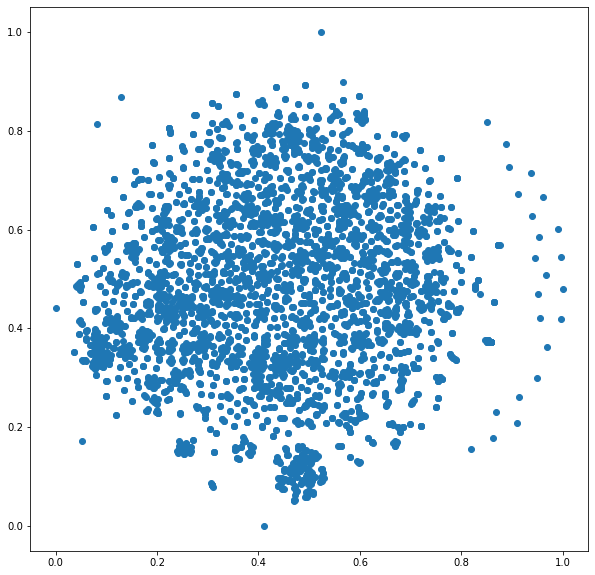

In [120]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.scatter(df_v.x, df_v.y)
plt.show()

In [121]:
from sklearn.cluster import DBSCAN

In [122]:
clustering = DBSCAN(eps=0.01, min_samples=3).fit(df_v[['x', 'y']].values)

In [123]:
from collections import Counter
from operator import itemgetter

In [124]:
counter = Counter(clustering.labels_)
for cl, cnt in sorted(counter.items(), key=itemgetter(1), reverse=True):
    print(f'{cl}\t{cnt}')

-1	497
42	82
421	81
0	74
84	65
139	59
43	58
55	56
99	45
80	44
110	41
115	38
147	36
158	35
148	34
102	33
53	32
73	31
96	31
161	31
234	31
259	31
174	30
119	29
359	29
87	28
159	28
127	28
242	27
39	26
95	26
48	25
49	25
90	25
143	25
178	25
77	24
151	24
176	24
61	23
63	22
65	22
245	22
257	22
284	22
7	21
125	21
182	21
283	21
10	20
112	20
121	20
164	20
175	20
2	19
86	19
98	19
109	19
37	18
51	18
92	18
94	18
243	18
17	17
199	17
281	17
340	17
114	16
156	16
186	16
238	16
280	16
66	15
85	15
177	15
232	15
424	15
56	14
120	14
171	14
211	14
299	14
38	13
44	13
54	13
69	13
78	13
81	13
106	13
244	13
298	13
426	13
128	12
181	12
213	12
248	12
294	12
1	11
11	11
32	11
62	11
67	11
68	11
72	11
116	11
141	11
145	11
166	11
204	11
307	11
308	11
336	11
422	11
423	11
50	10
75	10
105	10
142	10
146	10
173	10
191	10
214	10
314	10
318	10
371	10
396	10
397	10
58	9
70	9
82	9
89	9
97	9
113	9
117	9
152	9
193	9
221	9
256	9
258	9
268	9
275	9
277	9
289	9
303	9
309	9
363	9
390	9
406	9
429	9
6	8
14	8
29	8
47	8
57	8
60	8
71	8
74

In [125]:
df_v['dbscan2'] = clustering.labels_

In [130]:
df_v[df_v.dbscan2 == 50]

title  \
70    Психотронная тюрьма риторики: история о том, ч...   
1230                               Жак Арсак. 1929-2014   
1579  От базовых знаний до советов по оптимизации ко...   
2066  Психотронная тюрьма риторики: история о том, ч...   
2112   5 писателей-фантастов, работавших программистами   
2393  Решение, которое нужно принять, чтобы не жалет...   
2844  Как и зачем работать медленнее? Метод Сергея К...   
3460                         Музыка в День космонавтики   
3556  Удалёнка и самоизоляция: космический опыт в по...   
4168                       Автобиография Айзека Азимова   

                                                preview  \
70    Аристотель придумал, что в риторике есть четыр...   
1230  Давно собирался почитать книгу «Программирован...   
1579  Каждый раз на TeamLead Conf мы стараемся подби...   
2066  Аристотель придумал, что в риторике есть четыр...   
2112  Почти все писатели, приходя в литературу, уже ...   
2393  «Определение ада: «Тот человек, которым вы ста...   
2844  Будущий «отец» советской космонавтики Сергей К...   
3460  Традиционно на 12 апреля я размещаю в соц. сет...   
3556  НПП ИТЭЛМА выражает благодарность Филиппу Тере...   
4168  Только и разговоров что про «Дюну», ну, а я пр...   

                                                article  \
70    Аристотель придумал, что в риторике есть четыр...   
1230  Давно собирался почитать книгу «Программирован...   
1579  Каждый раз на TeamLead Conf мы стараемся подби...   
2066  Аристотель придумал, что в риторике есть четыр...   
2112  Почти все писатели, приходя в литературу, уже ...   
2393  «Определение ада: «Тот человек, которым вы ста...   
2844  Будущий «отец» советской космонавтики Сергей К...   
3460  Традиционно на 12 апреля я размещаю в соц. сет...   
3556  НПП ИТЭЛМА выражает благодарность Филиппу Тере...   
4168  Только и разговоров что про «Дюну», ну, а я пр...   

                                                   tags  \
70    [Блог компании RUVDS.com, Алгоритмы   *, Читал...   
1230         [Программирование   *, Разработка игр   *]   
1579  [Блог компании Конференции Олега Бунина (Онтик...   
2066  [Блог компании RUVDS.com, Алгоритмы   *, Читал...   
2112                               [Научная фантастика]   
2393  [Блог компании Alconost, Управление проектами ...   
2844  [Управление персоналом   *, Карьера в IT-индус...   
3460                  [Научно-популярное, Космонавтика]   
3556  [Блог компании НПП ИТЭЛМА, Научно-популярное, ...   
4168  [Блог компании Timeweb, Читальный зал, Научно-...   

                                                   link            user  \
70       https://habr.com/ru/company/ruvds/blog/559664/        ntsaplin   
1230                   https://habr.com/ru/post/212943/    MagisterLudi   
1579  https://habr.com/ru/company/oleg-bunin/blog/55...        pronskiy   
2066     https://habr.com/ru/company/ruvds/blog/559664/           Catx2   
2112                   https://habr.com/ru/post/573584/           sukhe   
2393  https://habr.com/ru/company/alconost/blog/346020/      Belisckner   
2844                   https://habr.com/ru/post/444546/        steanlab   
3460                   https://habr.com/ru/post/447784/   Refridgerator   
3556    https://habr.com/ru/company/itelma/blog/495858/        Asya_Dyu   
4168   https://habr.com/ru/company/timeweb/blog/581310/  usa_habro_user   

         tsne_x     tsne_y         x         y  dbscan2  
70    49.960693  21.873480  0.651907  0.576886       50  
1230  50.086346  21.714193  0.652431  0.576207       50  
1579  47.149197  24.708889  0.640196  0.588967       50  
2066  49.960415  21.872402  0.651906  0.576881       50  
2112  49.048000  22.880327  0.648105  0.581176       50  
2393  46.714306  25.130392  0.638384  0.590763       50  
2844  46.765533  24.756609  0.638597  0.589170       50  
3460  45.761459  23.820099  0.634415  0.585180       50  
3556  46.032116  24.070761  0.635542  0.586248       50  
4168  48.425564  23.425550  0.645513  0.5834

In [127]:
clusters = df_v.dbscan2.unique()
n_clusters = len(clusters)

In [128]:
colors = sns.color_palette('husl', n_clusters)

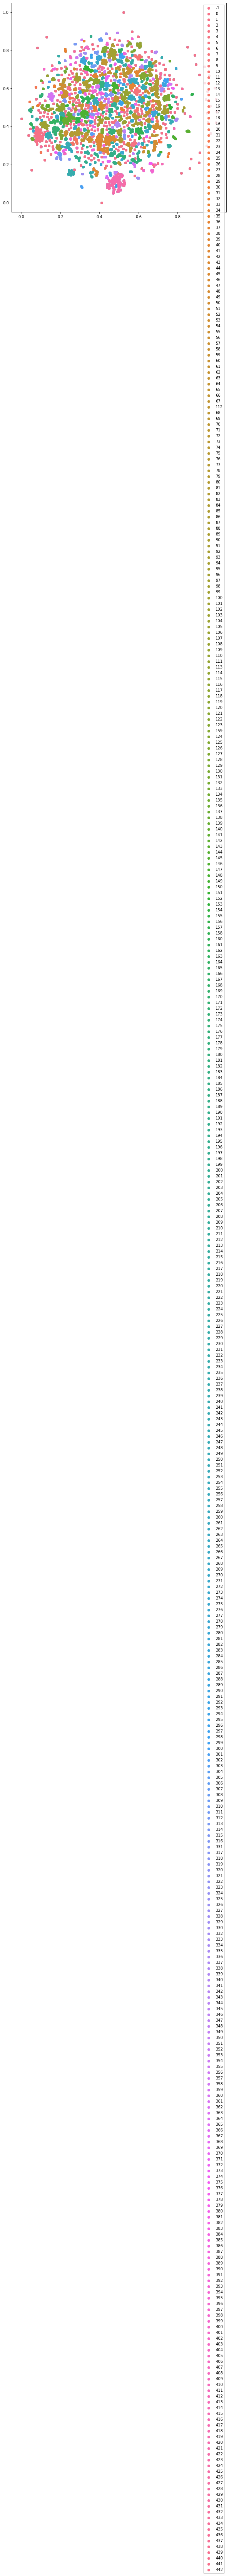

In [129]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)

ax.scatter(df_v.x, df_v.y)

for i, cl in enumerate(clusters):
    idx = df_v[df_v['dbscan2'] == cl].index
    ax.scatter(df_v.loc[idx, 'x'], df_v.loc[idx, 'y'], color=colors[i], label=f'{cl}')

ax.legend()
plt.show()